In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import string 
import spacy # language models
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [42]:
df=pd.read_csv("amazon_laptop_reviews.csv")
df

,Unnamed: 0,number of stars,date,profile_name,review
0,0,5.0 out of 5 stars,Reviewed in India on 22 June 2021,Moumita Paul,This is such a premium looking laptop at this ...
1,1,4.0 out of 5 stars,Reviewed in India on 6 July 2021,Kesav,Thin and light but delicate too. Bought it for...
2,2,5.0 out of 5 stars,Reviewed in India on 22 May 2021,Anoopsingh,I am using this laptop for a week and feeling ...
3,3,1.0 out of 5 stars,Reviewed in India on 16 August 2021,Madhu R.,"The MRP shown was around Rs. 45,000/-, as per ..."
4,4,5.0 out of 5 stars,Reviewed in India on 16 March 2022,Golden Bieber,The media could not be loaded.\n ...
...,...,...,...,...,...
95,95,5.0 out of 5 stars,Reviewed in India on 4 August 2022,Nirmal Kumar Rout,I use it as my personal computer for all sorts...
96,96,3.0 out of 5 stars,Reviewed in India on 24 July 2021,Kamal,Laptop is good value for money for online clas...
97,97,5.0 out of 5 stars,Reviewed in India on 19 January 2022,ayushi dixit,Under budget good
98,98,5.0 out of 5 stars,Reviewed in India on 16 July 2021,Ullas Arjun,Does the job. Good quality


In [43]:
df.isnull().sum()

Unnamed: 0         0
number of stars    0
date               0
profile_name       0
review             0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       100 non-null    int64 
 1   number of stars  100 non-null    object
 2   date             100 non-null    object
 3   profile_name     100 non-null    object
 4   review           100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [46]:
df

,Unnamed: 0,number of stars,date,profile_name,review
0,0,5.0 out of 5 stars,Reviewed in India on 22 June 2021,Moumita Paul,This is such a premium looking laptop at this ...
1,1,4.0 out of 5 stars,Reviewed in India on 6 July 2021,Kesav,Thin and light but delicate too. Bought it for...
2,2,5.0 out of 5 stars,Reviewed in India on 22 May 2021,Anoopsingh,I am using this laptop for a week and feeling ...
3,3,1.0 out of 5 stars,Reviewed in India on 16 August 2021,Madhu R.,"The MRP shown was around Rs. 45,000/-, as per ..."
4,4,5.0 out of 5 stars,Reviewed in India on 16 March 2022,Golden Bieber,The media could not be loaded.\n ...
...,...,...,...,...,...
95,95,5.0 out of 5 stars,Reviewed in India on 4 August 2022,Nirmal Kumar Rout,I use it as my personal computer for all sorts...
96,96,3.0 out of 5 stars,Reviewed in India on 24 July 2021,Kamal,Laptop is good value for money for online clas...
97,97,5.0 out of 5 stars,Reviewed in India on 19 January 2022,ayushi dixit,Under budget good
98,98,5.0 out of 5 stars,Reviewed in India on 16 July 2021,Ullas Arjun,Does the job. Good quality


In [47]:
df["date"]=df["date"].str.replace("Reviewed in India on","")

In [48]:
df["number of stars"]=df["number of stars"].str.replace("out of 5 stars","")

In [49]:
df["date"]=pd.to_datetime(df["date"])

In [50]:
df

,Unnamed: 0,number of stars,date,profile_name,review
0,0,5.0,2021-06-22,Moumita Paul,This is such a premium looking laptop at this ...
1,1,4.0,2021-07-06,Kesav,Thin and light but delicate too. Bought it for...
2,2,5.0,2021-05-22,Anoopsingh,I am using this laptop for a week and feeling ...
3,3,1.0,2021-08-16,Madhu R.,"The MRP shown was around Rs. 45,000/-, as per ..."
4,4,5.0,2022-03-16,Golden Bieber,The media could not be loaded.\n ...
...,...,...,...,...,...
95,95,5.0,2022-08-04,Nirmal Kumar Rout,I use it as my personal computer for all sorts...
96,96,3.0,2021-07-24,Kamal,Laptop is good value for money for online clas...
97,97,5.0,2022-01-19,ayushi dixit,Under budget good
98,98,5.0,2021-07-16,Ullas Arjun,Does the job. Good quality


In [51]:
df.drop(["Unnamed: 0","profile_name"],axis=1)

,number of stars,date,review
0,5.0,2021-06-22,This is such a premium looking laptop at this ...
1,4.0,2021-07-06,Thin and light but delicate too. Bought it for...
2,5.0,2021-05-22,I am using this laptop for a week and feeling ...
3,1.0,2021-08-16,"The MRP shown was around Rs. 45,000/-, as per ..."
4,5.0,2022-03-16,The media could not be loaded.\n ...
...,...,...,...
95,5.0,2022-08-04,I use it as my personal computer for all sorts...
96,3.0,2021-07-24,Laptop is good value for money for online clas...
97,5.0,2022-01-19,Under budget good
98,5.0,2021-07-16,Does the job. Good quality


# Removing uncessary spaces

In [52]:
df= [review.strip() for review in df.review] 
df

["This is such a premium looking laptop at this price point. Extremely light weight, classy looking body and keyboard, ssd boot, pre-installed windows 10, fingerprint recognition along with new features from the updated os. Everything is beautiful in both form and function. I am very satisfied with it, the packaging and even the small and compact power cable. Can't believe something so good can be available at this price point. The boot time is significantly fast than other laptops, comparable with macbook. I am techy and very nitpicky about gadget features and specifications at a given price. So this laptop is awesome in every sense!I just received it today. Will update this post if i see in any issues in the coming months.",
 "Thin and light but delicate too. Bought it for 23K, so bit pricy. As Win10 has Windows Defender, no need for redundant Antivirus program. So uninstalled McAFee as it slows down entry level systems. Uninstalled Microsoft Office 365 trial copy and installed MS Of

# Removing empty strings

In [53]:
df = [x for x in df if x]  
df

["This is such a premium looking laptop at this price point. Extremely light weight, classy looking body and keyboard, ssd boot, pre-installed windows 10, fingerprint recognition along with new features from the updated os. Everything is beautiful in both form and function. I am very satisfied with it, the packaging and even the small and compact power cable. Can't believe something so good can be available at this price point. The boot time is significantly fast than other laptops, comparable with macbook. I am techy and very nitpicky about gadget features and specifications at a given price. So this laptop is awesome in every sense!I just received it today. Will update this post if i see in any issues in the coming months.",
 "Thin and light but delicate too. Bought it for 23K, so bit pricy. As Win10 has Windows Defender, no need for redundant Antivirus program. So uninstalled McAFee as it slows down entry level systems. Uninstalled Microsoft Office 365 trial copy and installed MS Of

In [54]:
df= ' '.join(df)  #here we joined it all,we meed to join it so we can tokenise it further
df

"This is such a premium looking laptop at this price point. Extremely light weight, classy looking body and keyboard, ssd boot, pre-installed windows 10, fingerprint recognition along with new features from the updated os. Everything is beautiful in both form and function. I am very satisfied with it, the packaging and even the small and compact power cable. Can't believe something so good can be available at this price point. The boot time is significantly fast than other laptops, comparable with macbook. I am techy and very nitpicky about gadget features and specifications at a given price. So this laptop is awesome in every sense!I just received it today. Will update this post if i see in any issues in the coming months. Thin and light but delicate too. Bought it for 23K, so bit pricy. As Win10 has Windows Defender, no need for redundant Antivirus program. So uninstalled McAFee as it slows down entry level systems. Uninstalled Microsoft Office 365 trial copy and installed MS Office 

In [55]:
from nltk import tokenize

In [56]:
#wherever punctuation considers new sentence inshort it forms meaningful sentences from the raw data
sentences = tokenize.sent_tokenize("".join(df))
sentences

['This is such a premium looking laptop at this price point.',
 'Extremely light weight, classy looking body and keyboard, ssd boot, pre-installed windows 10, fingerprint recognition along with new features from the updated os.',
 'Everything is beautiful in both form and function.',
 'I am very satisfied with it, the packaging and even the small and compact power cable.',
 "Can't believe something so good can be available at this price point.",
 'The boot time is significantly fast than other laptops, comparable with macbook.',
 'I am techy and very nitpicky about gadget features and specifications at a given price.',
 'So this laptop is awesome in every sense!I just received it today.',
 'Will update this post if i see in any issues in the coming months.',
 'Thin and light but delicate too.',
 'Bought it for 23K, so bit pricy.',
 'As Win10 has Windows Defender, no need for redundant Antivirus program.',
 'So uninstalled McAFee as it slows down entry level systems.',
 'Uninstalled Mic

In [57]:
# convert tokenize sentences in to dataframe for stop words
conv_df = pd.DataFrame(sentences, columns=['sentence'])
conv_df

,sentence
0,This is such a premium looking laptop at this ...
1,"Extremely light weight, classy looking body an..."
2,Everything is beautiful in both form and funct...
3,"I am very satisfied with it, the packaging and..."
4,Can't believe something so good can be availab...
...,...
257,I use it as my personal computer for all sorts...
258,Laptop is good value for money for online clas...
259,Webcam video quality is a let down.
260,Otherwise good laptop in this budget Under bud...


In [58]:
stop_word = stopwords.words('english') #we do it to remove certain words without this we can still form meaningful sentences
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Removing stop words

In [60]:
#now lets look for the words whcih are not in stopwords
conv_df['no_stopword']= conv_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in(stop_word)]))
conv_df

,sentence,no_stopword
0,This is such a premium looking laptop at this ...,This premium looking laptop price point.
1,"Extremely light weight, classy looking body an...","Extremely light weight, classy looking body ke..."
2,Everything is beautiful in both form and funct...,Everything beautiful form function.
3,"I am very satisfied with it, the packaging and...","I satisfied it, packaging even small compact p..."
4,Can't believe something so good can be availab...,Can't believe something good available price p...
...,...,...
257,I use it as my personal computer for all sorts...,I use personal computer sorts activities.
258,Laptop is good value for money for online clas...,Laptop good value money online classes.
259,Webcam video quality is a let down.,Webcam video quality let down.
260,Otherwise good laptop in this budget Under bud...,Otherwise good laptop budget Under budget good...


In [63]:
conv_df['clean'] = conv_df['no_stopword'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))
conv_df['clean']

0               This premium looking laptop price point.
1      Extremely light weight, classy looking body ke...
2                    Everything beautiful form function.
3      I satisfied it, packaging even small compact p...
4      Can't believe something good available price p...
                             ...                        
257            I use personal computer sorts activities.
258              Laptop good value money online classes.
259                       Webcam video quality let down.
260    Otherwise good laptop budget Under budget good...
261    Good quality I doubtful buying truly amazing.....
Name: clean, Length: 262, dtype: object

In [64]:
conv_df = conv_df.drop(labels = ['sentence','no_stopword'],axis = 1)

In [65]:
#this given certain score for all the words so we can see which is negative positive and all
affin = pd.read_csv("Afinn.csv",encoding="latin-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [66]:
affin_data = affin.set_index('word')['value'].to_dict()
affin_data

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [67]:
NLP = spacy.load('en_core_web_sm')
sentiment_lexicon = affin_data
sentiment_lexicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [68]:
def calculate(text: str = None):
    score=0
    if text:
        sentence = NLP(text)
        for word in sentence:
            score+=sentiment_lexicon.get(word.lemma_, 0)
    return score

In [69]:
conv_df['sentiment_df']=conv_df['clean'].apply(calculate) #this score was score regarding to the numbers appearing in the sentence
conv_df

,clean,sentiment_df
0,This premium looking laptop price point.,0
1,"Extremely light weight, classy looking body ke...",3
2,Everything beautiful form function.,3
3,"I satisfied it, packaging even small compact p...",0
4,Can't believe something good available price p...,3
...,...,...
257,I use personal computer sorts activities.,0
258,Laptop good value money online classes.,3
259,Webcam video quality let down.,0
260,Otherwise good laptop budget Under budget good...,6


In [70]:
conv_df.sort_values(by = 'sentiment_df').head(10) 

,clean,sentiment_df
117,The total process took month...The laptop deli...,-3
230,"WORST LAPTOP, MONEY WASTE.",-3
71,No error nothing works.,-3
233,WORST SERVICE.,-3
98,Very dissappointed I sceptical buy Celeron pro...,-2
94,No doubt I expect purchasing ASUS.,-2
155,Returned back return processed First time prob...,-2
156,"After two days got stuck, none key functioning...",-2
49,Please dont buy.I used 1 month.Laptop hangs ma...,-2
110,After opening laptop setting id’s restarting O...,-2


In [72]:
conv_df['score']=conv_df['clean'].str.split().apply(len)
conv_df

,clean,sentiment_df,score
0,This premium looking laptop price point.,0,6
1,"Extremely light weight, classy looking body ke...",3,19
2,Everything beautiful form function.,3,4
3,"I satisfied it, packaging even small compact p...",0,9
4,Can't believe something good available price p...,3,7
...,...,...,...
257,I use personal computer sorts activities.,0,6
258,Laptop good value money online classes.,3,6
259,Webcam video quality let down.,0,5
260,Otherwise good laptop budget Under budget good...,6,9


In [73]:
conv_df['index'] = range(0,len(conv_df))
conv_df

,clean,sentiment_df,score,index
0,This premium looking laptop price point.,0,6,0
1,"Extremely light weight, classy looking body ke...",3,19,1
2,Everything beautiful form function.,3,4,2
3,"I satisfied it, packaging even small compact p...",0,9,3
4,Can't believe something good available price p...,3,7,4
...,...,...,...,...
257,I use personal computer sorts activities.,0,6,257
258,Laptop good value money online classes.,3,6,258
259,Webcam video quality let down.,0,5,259
260,Otherwise good laptop budget Under budget good...,6,9,260


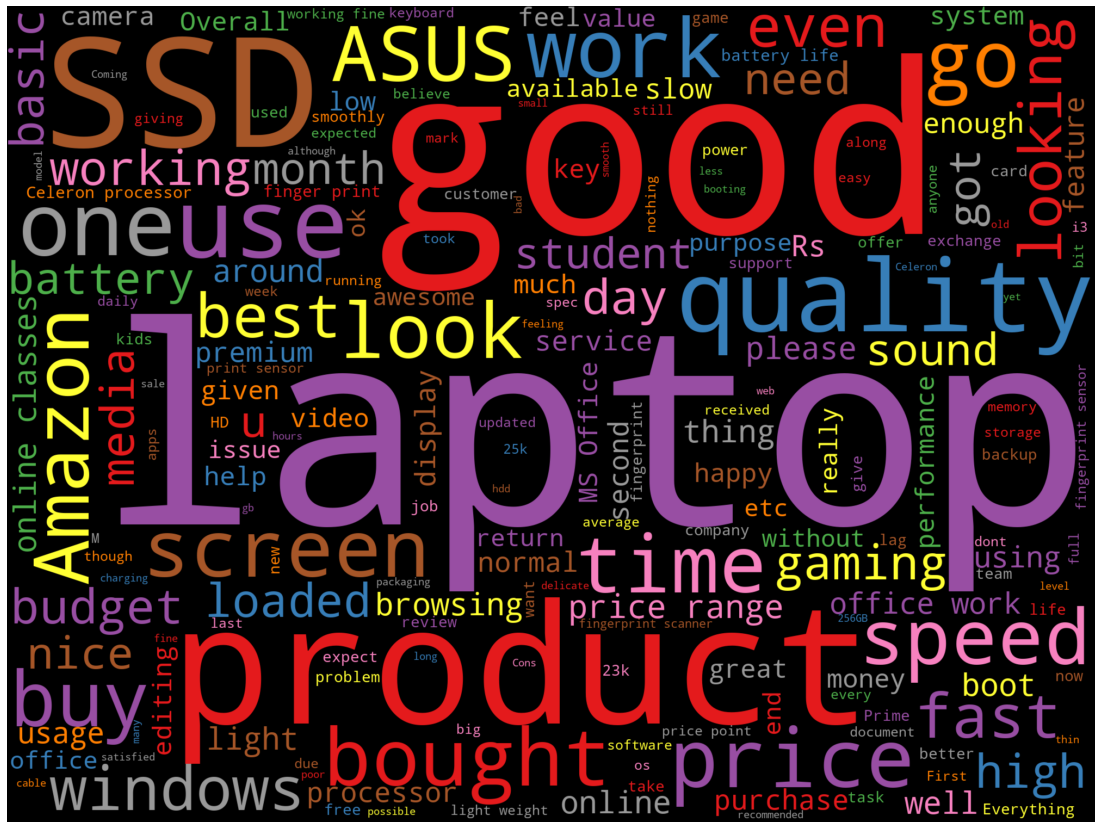

In [74]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width =2000, height = 1500,background_color='black',colormap='Set1',stopwords=stopwords).generate(df)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off');